In [1]:
# Necessary import
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(21)

In [2]:
# Generate data
mean_class_1 = [2, 2]
cov_class_1 = [[1, 0.5], [0.5, 1]]
class_1_data = np.random.multivariate_normal(mean_class_1, cov_class_1, 100)

mean_class_2 = [-2, -2]
cov_class_2 = [[1, 0.5], [0.5, 1]]
class_2_data = np.random.multivariate_normal(mean_class_2, cov_class_2, 100)

# Combine the two classes
X = np.vstack((class_1_data, class_2_data))
y = np.hstack((np.ones(100), np.zeros(100)))


# Shuffling & train/test split
shuffle_idx=np.arange(y.shape[0])
np.random.shuffle(shuffle_idx)

X,y=X[shuffle_idx],y[shuffle_idx]
X_train,X_test=X[shuffle_idx[:140]],X[shuffle_idx[140:]]
y_train,y_test=y[shuffle_idx[:140]],y[shuffle_idx[140:]]


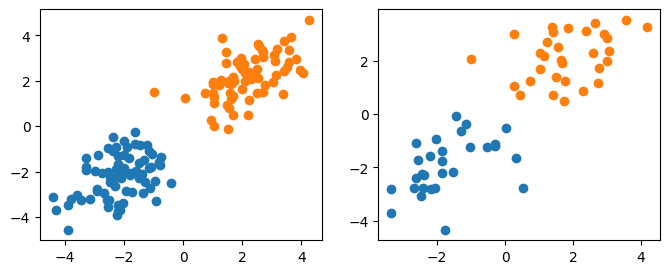

In [3]:
# Plot dataset
fig,ax=plt.subplots(1,2,figsize=(8,3))
ax[0].scatter(X_train[y_train==0][:,0],X_train[y_train==0][:,1],label='class 0')
ax[0].scatter(X_train[y_train==1][:,0],X_train[y_train==1][:,1],label='class 1')
ax[1].scatter(X_test[y_test==0][:,0],X_test[y_test==0][:,1],label='class 0')
ax[1].scatter(X_test[y_test==1][:,0],X_test[y_test==1][:,1],label='class 1')
plt.show()

In [4]:
#Logistic regression using pytorch
class LogisticRegression(torch.nn.Module):
  def __init__(self, num_features):
    super().__init__()
    #define linear network
    self.linear=torch.nn.Linear(num_features, 1)
    #initilise weights and bias to zero
    self.linear.weight.detach().zero_()
    self.linear.bias.detach().zero_()

  #define forward
  def forward(self, x):
    logits=self.linear(x)
    probas=torch.sigmoid(logits)
    return probas

In [5]:
#define model
model = LogisticRegression(num_features=2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

#convert train set to tensors
X_train_tensor= torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

In [6]:
def model_accuracy(true_labels, predicted_probas):
    predicted_labels = torch.where((predicted_probas > 0.5), 1, 0).view(-1)
    accuracy = torch.mean((predicted_labels == true_labels.view(-1)).float())
    return accuracy

epochs = 25
for epoch in range(epochs):

    #Get outputs
    outputs = model(X_train_tensor)

    #Get gradients
    loss = F.binary_cross_entropy(outputs, y_train_tensor, reduction='sum')
    optimizer.zero_grad()
    loss.backward()

    #Update weights
    optimizer.step()

    #Logging
    predicted_probas = model(X_train_tensor)
    accuracy = model_accuracy(y_train_tensor, predicted_probas)
    print(f'Epoch: {epoch + 1:03d} | Train ACC: {accuracy:.3f} | Cost: {F.binary_cross_entropy(predicted_probas, y_train_tensor):.3f}')


print('\nModel parameters:')
print(f' Weights: {model.linear.weight}')
print(f' Bias: {model.linear.bias}')



Epoch: 001 | Train ACC: 1.000 | Cost: 0.013
Epoch: 002 | Train ACC: 1.000 | Cost: 0.013
Epoch: 003 | Train ACC: 1.000 | Cost: 0.012
Epoch: 004 | Train ACC: 1.000 | Cost: 0.012
Epoch: 005 | Train ACC: 1.000 | Cost: 0.012
Epoch: 006 | Train ACC: 1.000 | Cost: 0.011
Epoch: 007 | Train ACC: 1.000 | Cost: 0.011
Epoch: 008 | Train ACC: 1.000 | Cost: 0.011
Epoch: 009 | Train ACC: 1.000 | Cost: 0.011
Epoch: 010 | Train ACC: 1.000 | Cost: 0.010
Epoch: 011 | Train ACC: 1.000 | Cost: 0.010
Epoch: 012 | Train ACC: 1.000 | Cost: 0.010
Epoch: 013 | Train ACC: 1.000 | Cost: 0.010
Epoch: 014 | Train ACC: 1.000 | Cost: 0.010
Epoch: 015 | Train ACC: 1.000 | Cost: 0.009
Epoch: 016 | Train ACC: 1.000 | Cost: 0.009
Epoch: 017 | Train ACC: 1.000 | Cost: 0.009
Epoch: 018 | Train ACC: 1.000 | Cost: 0.009
Epoch: 019 | Train ACC: 1.000 | Cost: 0.009
Epoch: 020 | Train ACC: 1.000 | Cost: 0.009
Epoch: 021 | Train ACC: 1.000 | Cost: 0.008
Epoch: 022 | Train ACC: 1.000 | Cost: 0.008
Epoch: 023 | Train ACC: 1.000 | 

In [7]:
# Evaluation
X_test_tensor= torch.tensor(X_test, dtype=torch.float32)
y_test_tensor= torch.tensor(y_test, dtype=torch.float32)

predicted_probas = model(X_test_tensor)
test_acc = model_accuracy(y_test_tensor, predicted_probas)

print(f'Test set accuracy is {test_acc *100:.2f}')

Test set accuracy is 100.00


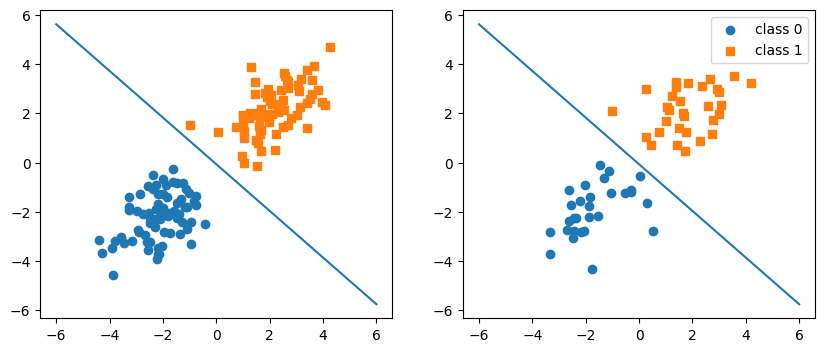

In [8]:
# Decision Boundary
w, b = model.linear.weight.detach().view(-1), model.linear.bias.detach()

x_min = -6
y_min = ( (-(w[0] * x_min) - b[0])  / w[1] )

x_max = 6
y_max = ( (-(w[0] * x_max) - b[0])  / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10, 4))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper right')
plt.show()
